In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import img_as_float
import pylab

In [2]:
%matplotlib inline

In [3]:
n_max = 20
nn = 8

In [4]:
def view_img(img, shape):
    pylab.imshow(np.array(img).reshape(shape))
    plt.show()

In [5]:
def mse(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    return np.average((a - b) ** 2)

In [6]:
def psnr(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    return 10 * np.log10(1 / mse(a, b))

In [7]:
img = imread('coursera/task6.1.jpg')
shape_orig = img.shape
img2 = img_as_float(img).reshape((-1, 3))
df = pd.DataFrame(img2.copy(), columns=list('RGB'))

In [8]:
kms = dict()
for i in range(1, n_max+1):
    kms[i] = KMeans(random_state=241, init='k-means++', n_clusters=i, n_jobs=4).fit(df)

In [40]:
def new_img(a, n, cl, i_type = 'mean'):
    df_mean = a.copy()
    df_mean.loc[:, 'C'] = pd.Series(cl)
    if i_type == 'mean':
        m = df_mean.groupby('C').mean()
    elif i_type == 'median':
        m = df_mean.groupby('C').median()
    else:
        raise ValueError('mean or median')
    for j in range(n):
        df_mean.loc[df_mean['C'] == j, list('RGB')] = list(m.iloc[j])
    return df_mean[list('RGB')]

In [41]:
img_means = dict()
for i, e in kms.items():
    img_means[i] = new_img(df, i, e.labels_)

In [42]:
img_meds = dict()
for i, e in kms.items():
    img_meds[i] = new_img(df, i, e.labels_, i_type='median')

In [43]:
for i in img_meds:
    v_mean = img_means[i]
    v_med = img_meds[i]
    metr_mean = psnr(img2, v_mean)
    metr_med = psnr(img2, v_med)
    cond = metr_mean >= 20 or metr_med >= 20
    print(f'{i}:\t{metr_mean:.3f}\t{metr_med:.3f}\t{cond}')

1:	9.819	9.428	False
2:	12.080	11.655	False
3:	13.153	12.775	False
4:	14.368	14.006	False
5:	15.527	15.178	False
6:	16.544	16.051	False
7:	17.641	17.339	False
8:	18.437	18.138	False
9:	19.113	18.814	False
10:	19.641	19.417	False
11:	20.128	19.841	True
12:	20.593	20.304	True
13:	21.021	20.793	True
14:	21.297	21.041	True
15:	21.607	21.406	True
16:	21.863	21.676	True
17:	22.120	21.919	True
18:	22.335	22.129	True
19:	22.522	22.361	True
20:	22.699	22.480	True


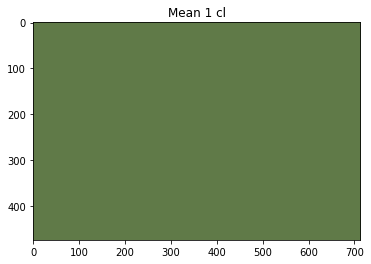

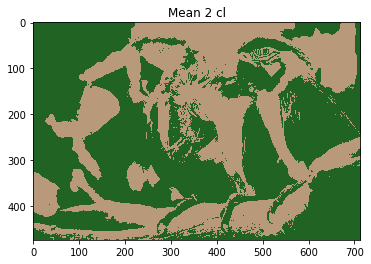

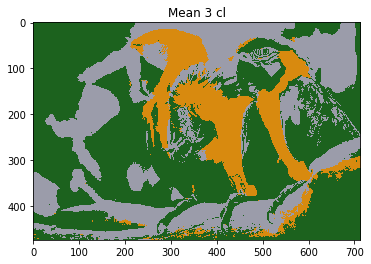

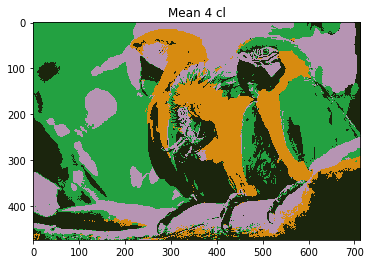

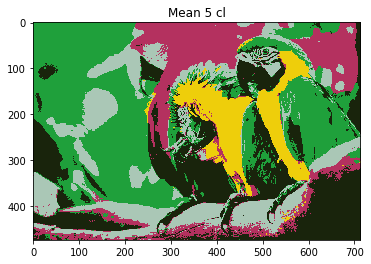

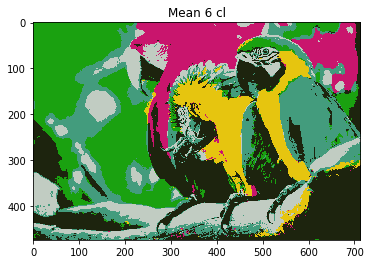

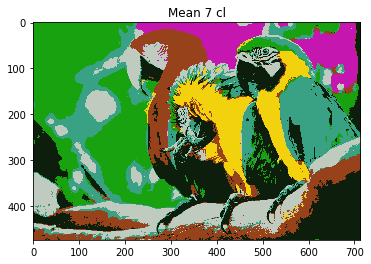

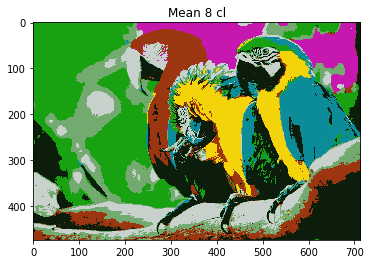

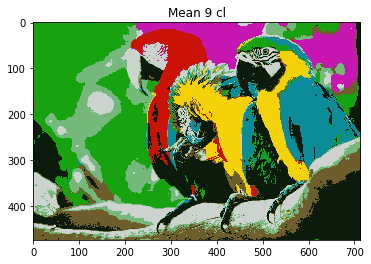

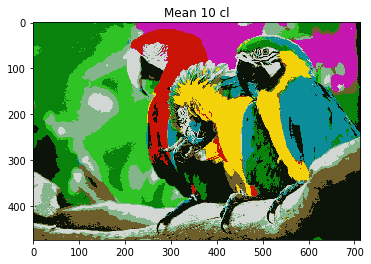

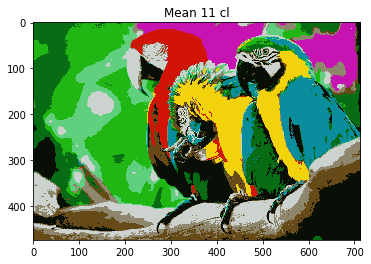

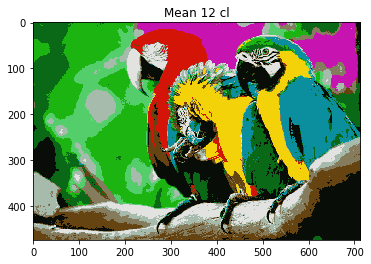

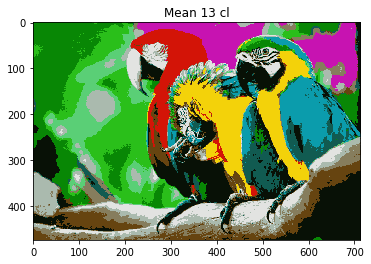

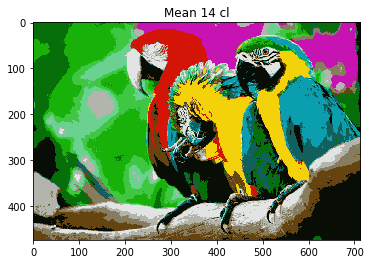

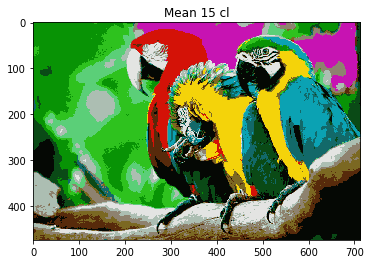

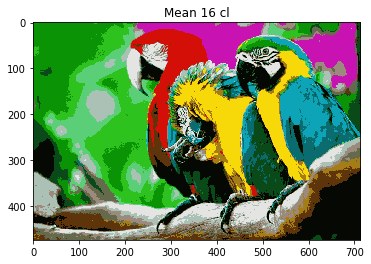

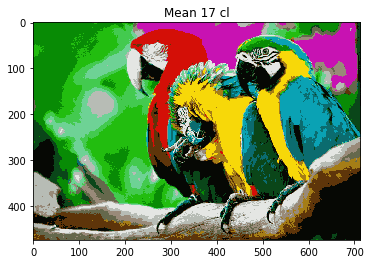

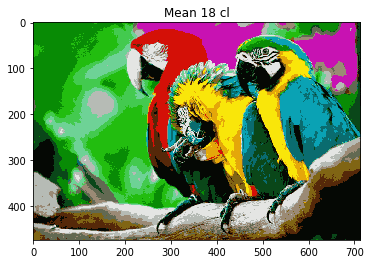

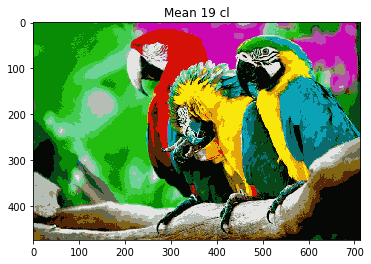

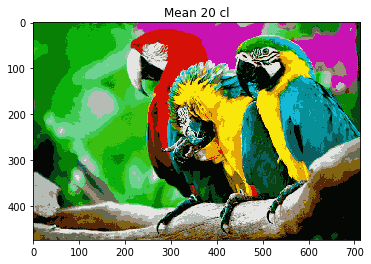

In [44]:
for i in img_means:
    plt.title(f'Mean {i} cl')
    view_img(img_means[i], shape_orig)

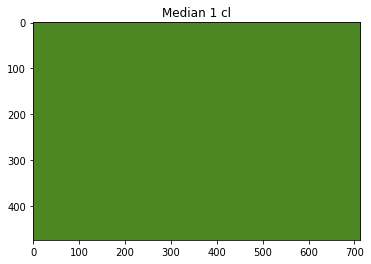

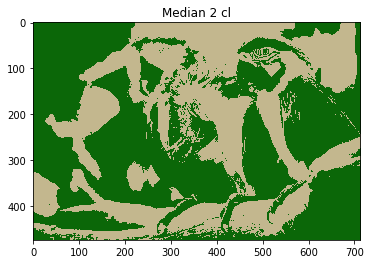

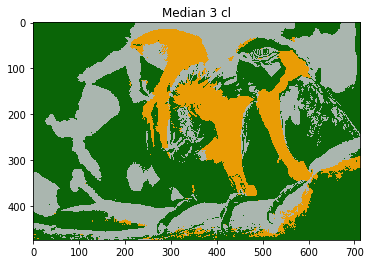

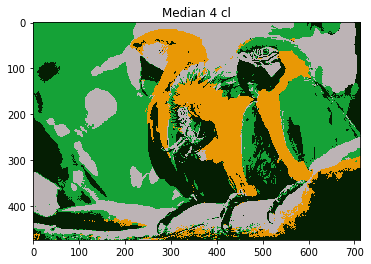

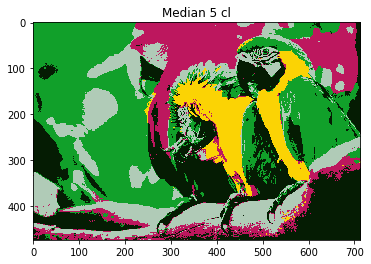

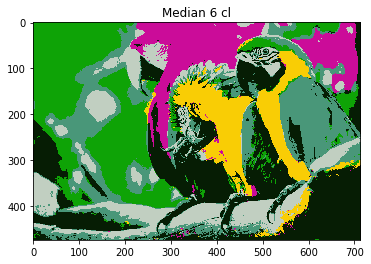

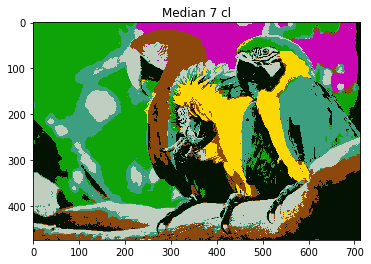

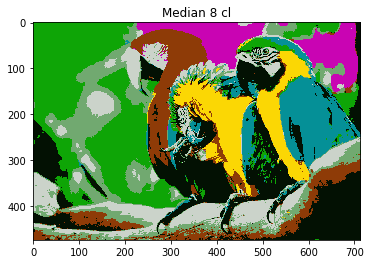

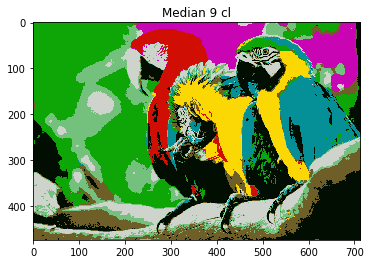

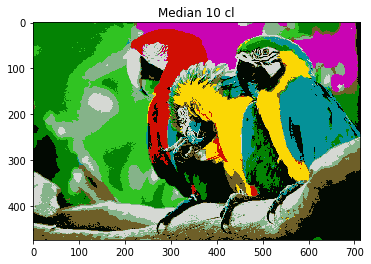

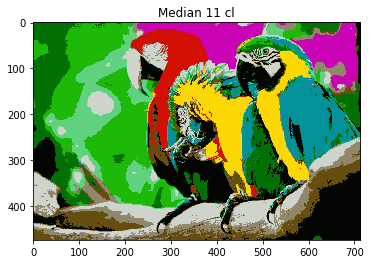

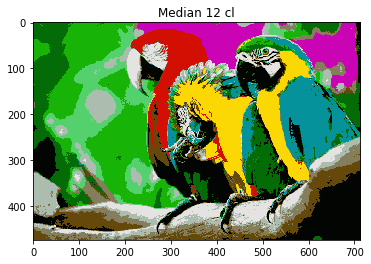

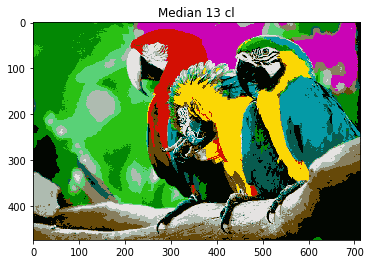

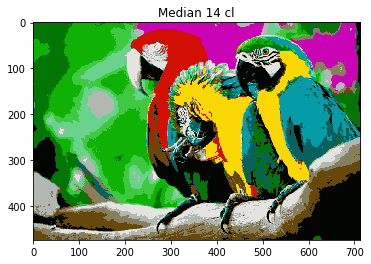

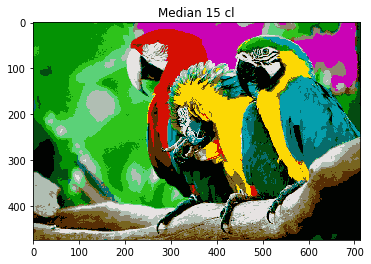

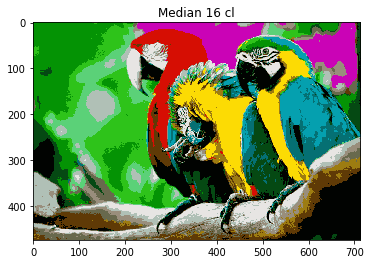

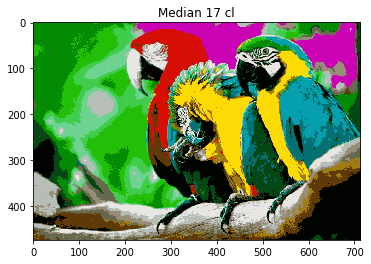

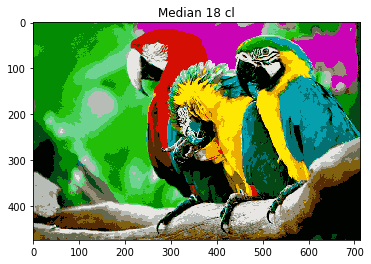

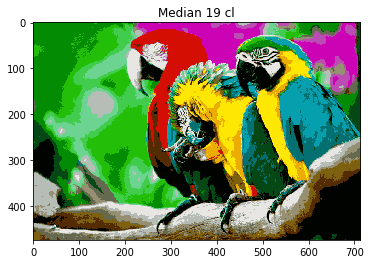

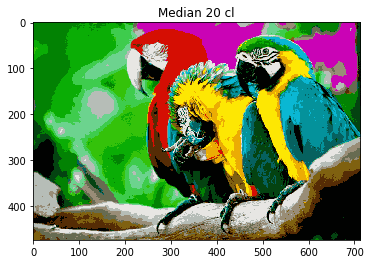

In [45]:
for i in img_meds:
    plt.title(f'Median {i} cl')
    view_img(img_meds[i], shape_orig)